<a href="https://colab.research.google.com/github/bcury/ComputerVision-and-NLP/blob/main/ML_Reconhecimento_Imagem_PyTorch_deepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelos que temos:

In [1]:
from torchvision import models
dir(models)

['AlexNet',
 'DenseNet',
 'EfficientNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'RegNet',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'efficientnet',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'feature_extraction',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'regnet',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 're

**ResNet**

In [2]:
resnet = models.resnet101(pretrained=True)
resnet

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [3]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

REconhecimento de Imagem

In [4]:
from google.colab import files
uploaded = files.upload()
from PIL import Image
imagem = Image.open('/content/download.jpg')

Saving download.jpg to download (1).jpg


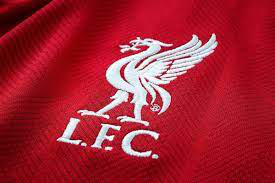

In [5]:
imagem

In [10]:
imagem_t = preprocess(imagem)

In [11]:
import torch
batch_t = torch.unsqueeze(imagem_t, 0)
resnet.eval()
out = resnet(batch_t)
out

tensor([[-1.6934e+00, -2.1468e+00, -1.5053e+00, -3.4383e+00, -1.1481e+00,
         -2.7122e+00, -3.3868e+00,  1.5857e-01, -2.4032e+00, -2.8499e+00,
         -2.0812e+00, -2.4580e+00, -3.2052e+00, -3.2424e+00, -1.9226e+00,
         -1.3291e+00, -2.1351e+00, -1.4833e+00, -3.3122e+00, -2.2938e+00,
         -4.1734e+00, -4.8231e+00, -3.4151e+00, -4.2477e+00, -4.3142e+00,
         -3.4945e+00, -1.7583e+00, -6.7377e-01, -9.6339e-01, -3.1914e+00,
         -2.5610e+00,  2.5794e-01, -2.6977e-01, -4.0669e+00, -2.9500e+00,
         -3.0525e+00, -6.2303e-01, -1.8969e+00, -5.7194e-01, -7.6290e-02,
          2.1467e+00, -1.0500e+00, -9.7284e-01, -2.1124e+00, -7.2174e-01,
         -1.1825e+00,  9.7229e-01,  2.9764e-01, -2.6897e+00, -1.8585e+00,
         -2.2552e+00, -1.0459e-01,  2.7289e-01, -3.2469e-01, -1.1195e+00,
          1.5687e-01,  7.7670e-01, -7.5308e-01, -2.4659e+00, -9.6532e-01,
         -1.2021e+00,  2.3565e-01, -7.3053e-01, -2.1193e-01,  9.7988e-01,
         -2.1247e+00, -3.6819e-01, -1.

In [14]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('492, chest', 14.773270606994629)